In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np

In [6]:
data = pd.read_csv('data/public/train.csv',sep=';')

In [7]:
data.head()

,Unnamed: 0.1,Unnamed: 0,Sample_ID,Site_ID,ClimSST,Temperature_Kelvin,Temperature_Mean,Temperature_Minimum,Temperature_Maximum,Temperature_Kelvin_Standard_Deviation,...,TSA_DHW_Standard_Deviation,TSA_DHWMax,TSA_DHWMean,Depth_m,Quadrat_No,Distance_to_Shore,Exposure,Turbidity,Cyclone_Frequency,Percent_Bleached
0,2,3,10274495,12082,301.65,303.50,299.79,293.35,305.54,2.52,...,0.74,6.05,0.22,8.3,NaN,8311.0,2,0.0586,56.583448,4.76
1,3,4,10274496,12083,299.31,300.84,299.75,293.68,305.44,2.54,...,0.93,10.39,0.27,14.9,NaN,10747.0,2,0.0543,52.842523,21.88
2,4,5,10274497,12084,300.56,302.65,299.81,293.35,305.47,2.50,...,0.83,7.18,0.23,10.7,NaN,9396.0,2,0.0571,56.583448,19.66
3,5,6,10274498,12085,299.75,302.43,299.81,293.35,305.47,2.50,...,0.83,7.18,0.23,7.6,NaN,9408.0,2,0.0571,56.583448,28.03
4,6,7,10274499,12086,297.65,295.69,299.81,293.35,305.47,2.50,...,0.83,7.18,0.23,10.0,NaN,9362.0,2,0.0571,56.583448,2.75


In [9]:
data = data.drop(['Unnamed: 0','Unnamed: 0.1'], axis=1)

In [10]:
data.head()

,Sample_ID,Site_ID,ClimSST,Temperature_Kelvin,Temperature_Mean,Temperature_Minimum,Temperature_Maximum,Temperature_Kelvin_Standard_Deviation,Windspeed,SSTA,...,TSA_DHW_Standard_Deviation,TSA_DHWMax,TSA_DHWMean,Depth_m,Quadrat_No,Distance_to_Shore,Exposure,Turbidity,Cyclone_Frequency,Percent_Bleached
0,10274495,12082,301.65,303.50,299.79,293.35,305.54,2.52,2,0.49,...,0.74,6.05,0.22,8.3,NaN,8311.0,2,0.0586,56.583448,4.76
1,10274496,12083,299.31,300.84,299.75,293.68,305.44,2.54,6,-0.42,...,0.93,10.39,0.27,14.9,NaN,10747.0,2,0.0543,52.842523,21.88
2,10274497,12084,300.56,302.65,299.81,293.35,305.47,2.50,5,0.36,...,0.83,7.18,0.23,10.7,NaN,9396.0,2,0.0571,56.583448,19.66
3,10274498,12085,299.75,302.43,299.81,293.35,305.47,2.50,7,0.54,...,0.83,7.18,0.23,7.6,NaN,9408.0,2,0.0571,56.583448,28.03
4,10274499,12086,297.65,295.69,299.81,293.35,305.47,2.50,7,-0.91,...,0.83,7.18,0.23,10.0,NaN,9362.0,2,0.0571,56.583448,2.75


In [11]:
data.columns

Index(['Sample_ID', 'Site_ID', 'ClimSST', 'Temperature_Kelvin',
       'Temperature_Mean', 'Temperature_Minimum', 'Temperature_Maximum',
       'Temperature_Kelvin_Standard_Deviation', 'Windspeed', 'SSTA',
       'SSTA_Standard_Deviation', 'SSTA_Mean', 'SSTA_Minimum', 'SSTA_Maximum',
       'SSTA_Frequency', 'SSTA_Frequency_Standard_Deviation',
       'SSTA_FrequencyMax', 'SSTA_FrequencyMean', 'SSTA_DHW',
       'SSTA_DHW_Standard_Deviation', 'SSTA_DHWMax', 'SSTA_DHWMean', 'TSA',
       'TSA_Standard_Deviation', 'TSA_Minimum', 'TSA_Maximum', 'TSA_Mean',
       'TSA_Frequency', 'TSA_Frequency_Standard_Deviation', 'TSA_FrequencyMax',
       'TSA_FrequencyMean', 'TSA_DHW', 'TSA_DHW_Standard_Deviation',
       'TSA_DHWMax', 'TSA_DHWMean', 'Depth_m', 'Quadrat_No',
       'Distance_to_Shore', 'Exposure', 'Turbidity', 'Cyclone_Frequency',
       'Percent_Bleached'],
      dtype='object')

In [12]:
print('Number of samples : {}'.format(data.shape[0]))
print('Number of attributes : {}'.format(data.shape[1]))

Number of samples : 4021
Number of attributes : 42


<Axes: >

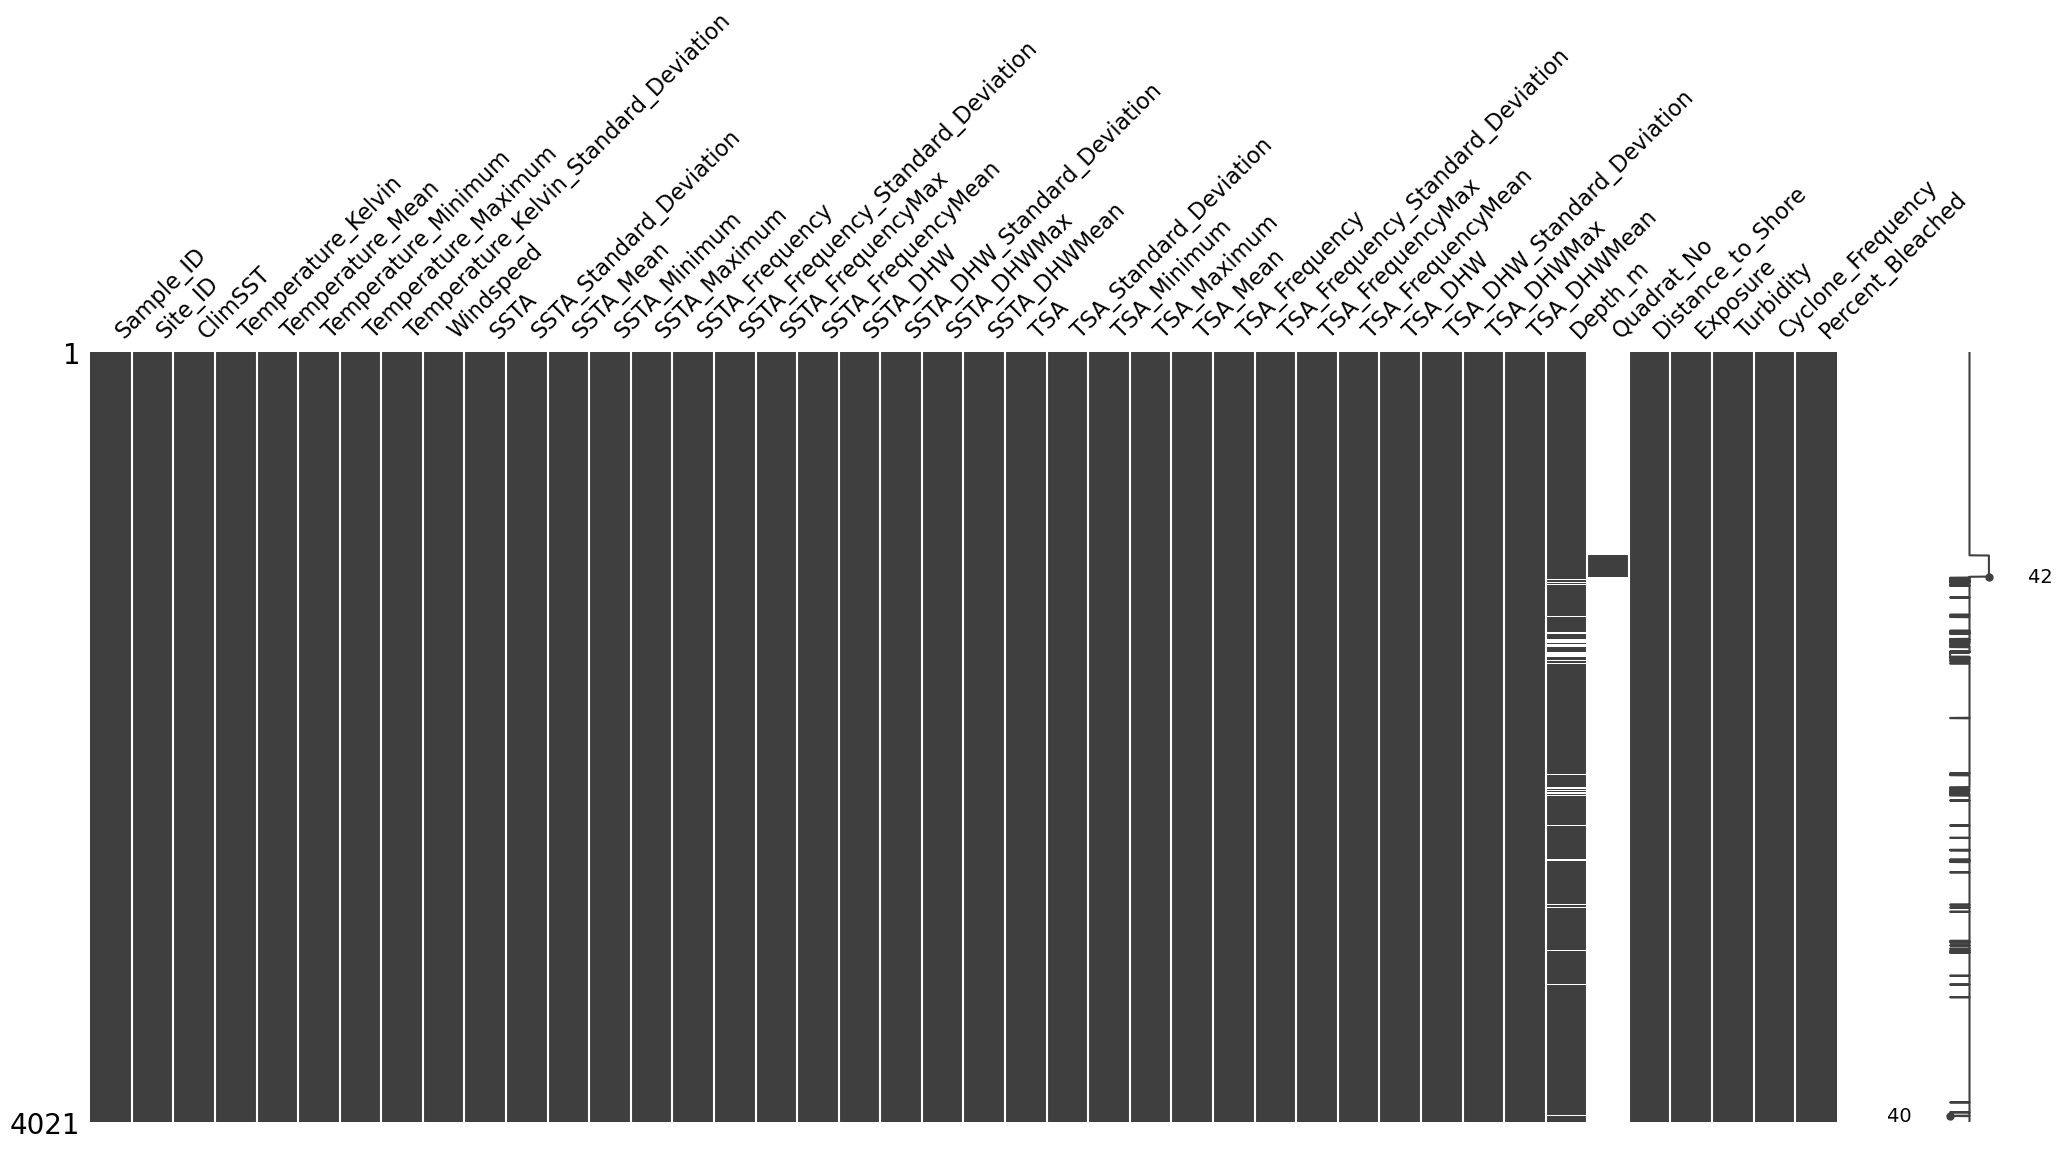

In [13]:
# Missingness
msno.matrix(data)

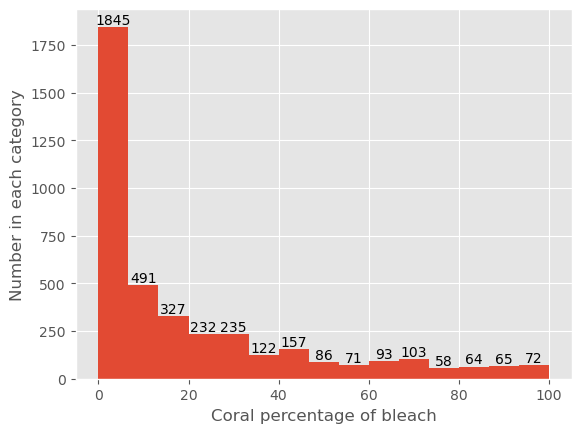

In [31]:
plt.style.use('ggplot')
# Normal vesrion
#plt.hist(data.Percent_Bleached, bins=15, density=True)

# With exact value
counts, edges, bars = plt.hist(data.Percent_Bleached, bins=15)
plt.bar_label(bars)
        
plt.xlabel('Coral percentage of bleach')
plt.ylabel('Number in each category');

In [35]:
data.Percent_Bleached.value_counts(dropna=False, normalize=True).head(10)

0.0      0.149963
100.0    0.010196
33.3     0.009948
10.0     0.009948
40.0     0.008207
20.0     0.006715
1.0      0.006217
5.0      0.005969
25.0     0.005720
70.0     0.005720
Name: Percent_Bleached, dtype: float64

<Axes: >

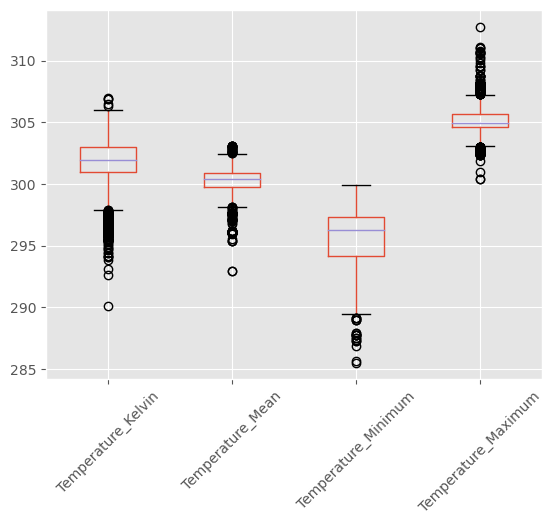

In [47]:
data.boxplot(column=['Temperature_Kelvin', 'Temperature_Mean', 'Temperature_Minimum','Temperature_Maximum'],
            rot = 45)

<Axes: >

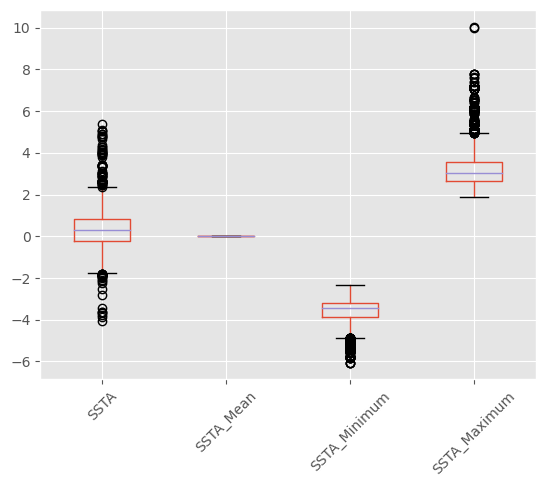

In [36]:
data.boxplot(column=['SSTA', 'SSTA_Mean', 'SSTA_Minimum','SSTA_Maximum'],
            rot = 45)